In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install pymc>=4

import pymc
import arviz as az
import xarray as xr

In [2]:
df = pd.read_csv('Competition_Data.csv')
df.head(10)

,Index,Fiscal_Week_ID,Store_ID,Item_ID,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
0,0,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,206.44
1,1,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,158.01
2,2,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,278.03
3,3,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,222.66
4,4,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,195.32
5,5,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,108.75
6,6,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,219.64
7,7,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,100.11
8,8,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,86.10
9,9,2019-11,store_459,item_526,134.49,435,4716.74,11272.59,231.21


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,100000.0,49999.500000,28867.657797,0.00,24999.7500,49999.50,74999.2500,99999.00
Price,100000.0,167.017783,69.503418,47.70,105.4100,159.42,221.9000,310.66
Item_Quantity,100000.0,399.611320,59.440567,285.00,348.0000,401.00,451.0000,522.00
Sales_Amount_No_Discount,100000.0,4771.147859,1524.737540,2003.70,3481.4600,4746.53,6045.4775,7853.81
Sales_Amount,100000.0,11396.865217,2091.246764,7613.56,9551.5900,11240.02,13175.2300,15685.08
Competition_Price,100000.0,174.280887,71.545584,47.95,118.6275,162.51,237.3350,313.64


>> Elasticity (coefficient) can be calculated at an individual SKU level or at a segment level.

>> Data used is for an item across multiple stores.

In [4]:
dff = df.loc[df['Item_ID'] == 'item_526']
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 0 to 79899
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Index                     560 non-null    int64  
 1   Fiscal_Week_ID            560 non-null    object 
 2   Store_ID                  560 non-null    object 
 3   Item_ID                   560 non-null    object 
 4   Price                     560 non-null    float64
 5   Item_Quantity             560 non-null    int64  
 6   Sales_Amount_No_Discount  560 non-null    float64
 7   Sales_Amount              560 non-null    float64
 8   Competition_Price         560 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 43.8+ KB


In [5]:
dff.describe()

,Index,Price,Item_Quantity,Sales_Amount_No_Discount,Sales_Amount,Competition_Price
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,41431.285714,132.032911,444.571429,4729.203625,11344.707411,174.699107
std,28320.287071,3.774623,13.698200,136.156351,299.659288,70.279587
min,0.000000,125.670000,424.000000,4518.480000,10810.390000,53.560000
25%,19649.750000,128.650000,433.000000,4630.740000,11168.100000,114.217500
50%,40269.500000,131.400000,445.000000,4704.890000,11320.760000,181.510000
75%,60299.250000,135.100000,458.000000,4848.802500,11544.720000,222.517500
max,79899.000000,138.670000,467.000000,4974.390000,11877.210000,303.600000


In [6]:
print(round(dff['Price'].std(), 2))

3.77


Text(0, 0.5, 'Quantity')

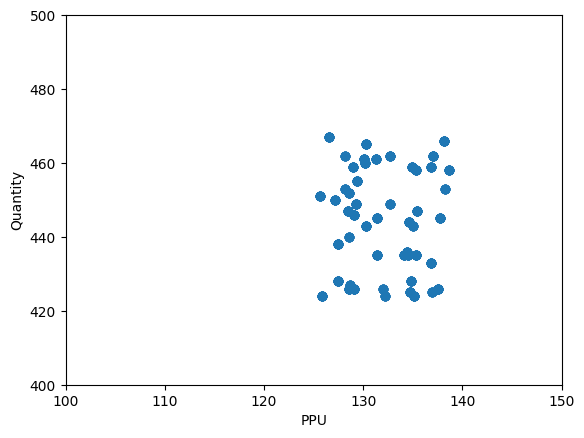

In [8]:
plt.scatter(x = dff['Price'], y = dff['Item_Quantity'])      #PPU is price per unit/item
#plt.title('')
plt.ylim([400, 500])
plt.xlim([100, 150])
plt.xlabel('PPU')
plt.ylabel('Quantity')

> Lets fit a Bayesian linear regression model to this data.

>> Non-linear elasiticity is given by percentage change in quantity due to  percentage change in price.


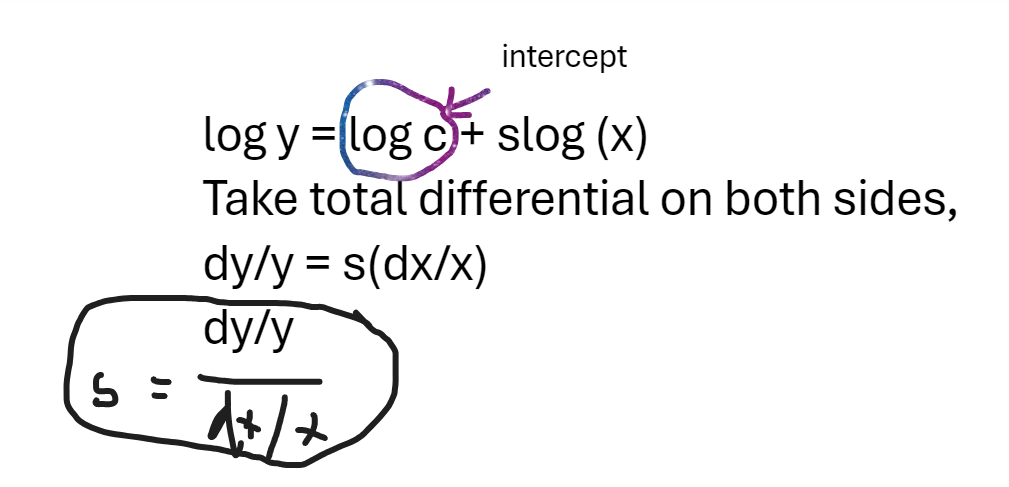

>> Also, we consider a single variable (not multiple) regression model.

>> Competition price could be another regressor.

In [ ]:
with pymc.Model() as ols_glm:
    #Define prior distributions for intercept and regression coefficients
    priors = {
        "Intercept": pymc.Normal.dist(mu = 0.0, sigma = 1.0),
        "x": pymc.Normal.dist(mu = 0.0, sigma = 1.0),
        "Slope": pymc.Normal.dist(mu = 0.0, sigma = 1.0)
    }
    #setup model with Normal likelihood (uses HalfCauchy for error prior)
    likelihood = pymc.Normal("y", dff['Price'].values)

    trace_ols_glm = pymc.sample(draws = 2000, tune = 100, discard_tuned_samples = True)   #draw 2000 posterior samples

Output()

Output()

>> Number of iterations to tune is specified as an argument, defaults to 1000. Samplers adjust the step sizes during tuning. Tuning samples will be drawn in addition to the number specified in the 'draws' argument, and will be discarded unless 'discard_tuned_samples' is set to False.

array([[<Axes: title={'center': 'y'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

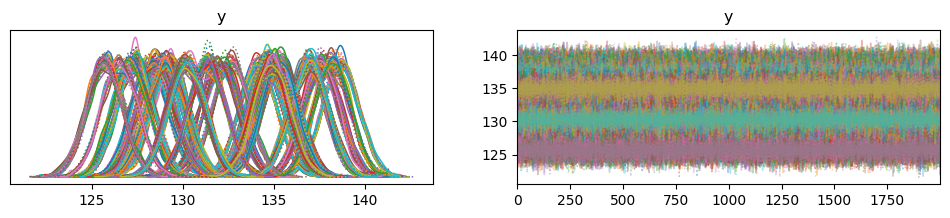

In [ ]:
az.plot_trace(trace_ols_glm)

In [ ]:
az.summary(trace_ols_glm)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
y[0],134.486,1.025,132.555,136.409,0.010,0.007,10129.0,2753.0,1.0
y[1],134.505,0.994,132.684,136.433,0.010,0.007,10494.0,2956.0,1.0
y[2],134.472,0.987,132.676,136.390,0.010,0.007,9547.0,2690.0,1.0
y[3],134.461,0.973,132.533,136.189,0.009,0.006,11407.0,2928.0,1.0
y[4],134.475,1.019,132.544,136.349,0.010,0.007,11455.0,2818.0,1.0
...,...,...,...,...,...,...,...,...,...
y[555],130.292,1.005,128.430,132.239,0.010,0.007,10505.0,2730.0,1.0
y[556],130.290,0.987,128.378,132.031,0.009,0.006,13456.0,2687.0,1.0
y[557],130.272,1.012,128.362,132.135,0.010,0.007,10915.0,2465.0,1.0
y[558],130.305,1.037,128.400,132.327,0.010,0.007,10941.0,2363.0,1.0


In [ ]:
az.summary(trace_ols_glm)['mean'].mean()

132.03298214285715

In [ ]:
az.summary(trace_ols_glm)['sd'].mean()

0.9998964285714286

>> The trace plot represents the KDE and convergence of the model.

> Bayesian hierarchical model

In [ ]:
occurences = np.random.normal(132.03, 3.77, 560)

with pymc.Model() as hierarchical_model:
    #priors
    prior_sigma = pymc.HalfCauchy("prior_sigma", beta = 0.5)
    prior_mu = pymc.Normal('prior_mu', mu = 132.033, sigma = 0.999)
    intercept = pymc.Normal("Intercept", mu = 0.0, sigma = 1.0)
    slope = pymc.Normal("slope", mu = 0.0, sigma = 1.0)

    likelihood = pymc.Normal("y", mu = prior_mu, sigma = prior_sigma, observed = occurences)

with hierarchical_model:
    #trace = pymc.sample(draws = 3000, target_accept = 0.97)
    trace =  pymc.sample(draws = 3000, tune = 100, discard_tuned_samples = True)

Output()

Output()

>> In the NUTS sampling method, 'target_accept' is a float in [0, 1]. The step-size is tuned such that the acceptance rate is approximated. Higher values like 0.95 often work better for problematic posteriors. This argument can be passed directly to sample.

array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'prior_mu'}>,
        <Axes: title={'center': 'prior_mu'}>],
       [<Axes: title={'center': 'prior_sigma'}>,
        <Axes: title={'center': 'prior_sigma'}>],
       [<Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'slope'}>]], dtype=object)

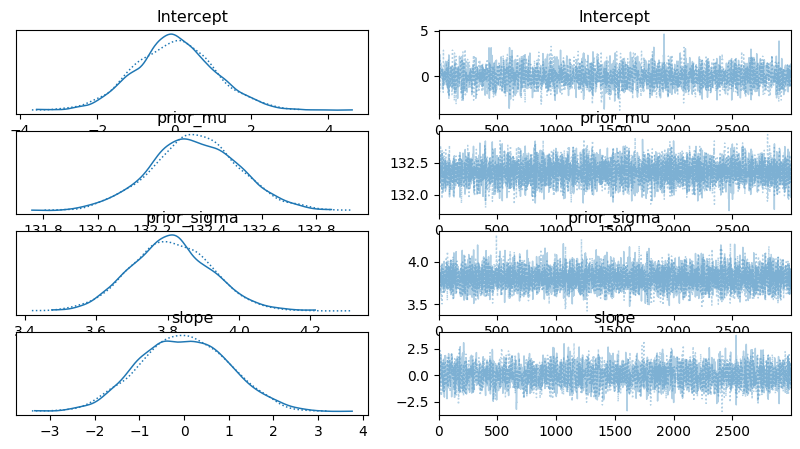

In [ ]:
az.plot_trace(trace, figsize = (10, 5))

array([<Axes: title={'center': 'Intercept'}>,
       <Axes: title={'center': 'prior_mu'}>,
       <Axes: title={'center': 'prior_sigma'}>,
       <Axes: title={'center': 'slope'}>], dtype=object)

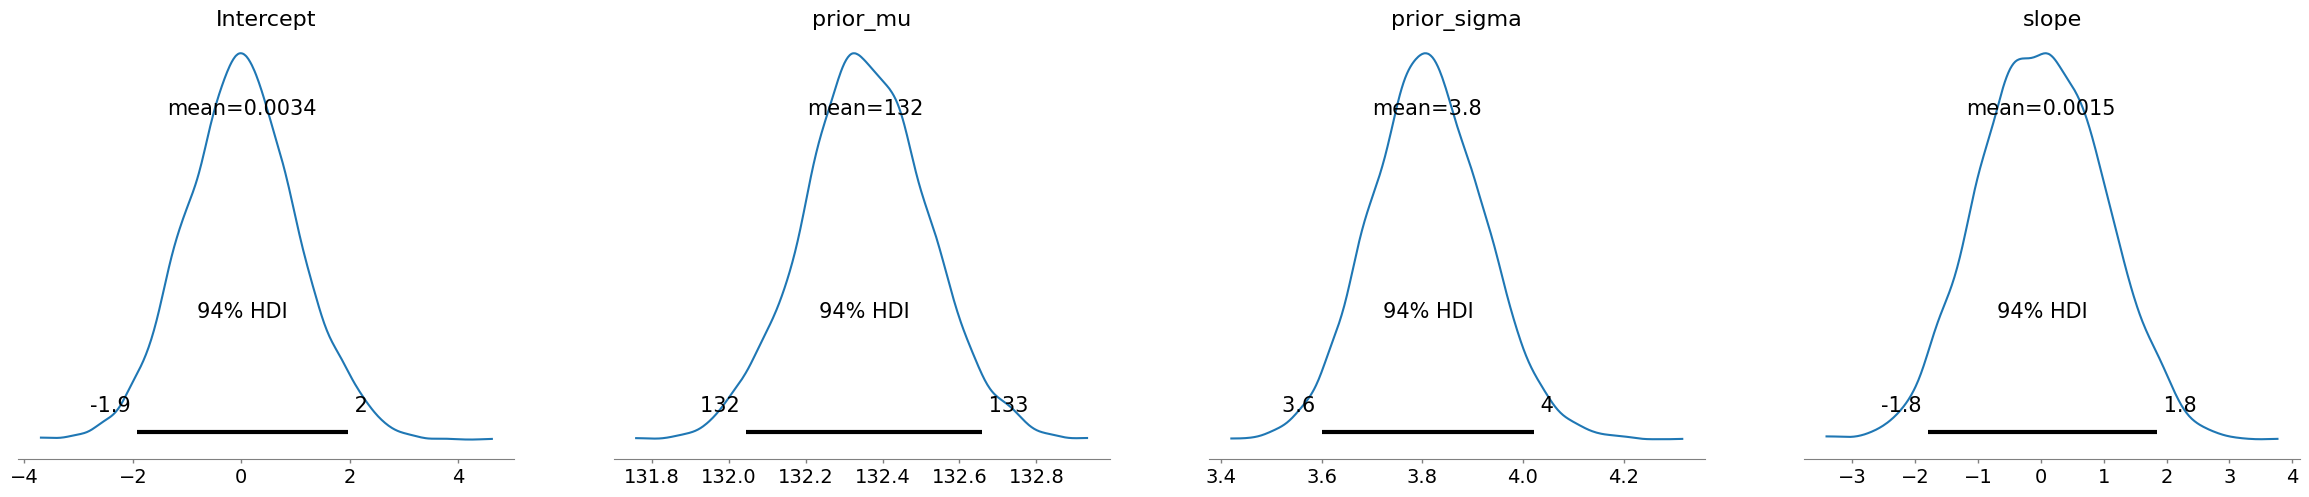

In [ ]:
az.plot_posterior(trace)

array([[<Axes: ylabel='prior_mu'>, <Axes: >, <Axes: >],
       [<Axes: ylabel='prior_sigma'>, <Axes: >, <Axes: >],
       [<Axes: xlabel='Intercept', ylabel='slope'>,
        <Axes: xlabel='prior_mu'>, <Axes: xlabel='prior_sigma'>]],
      dtype=object)

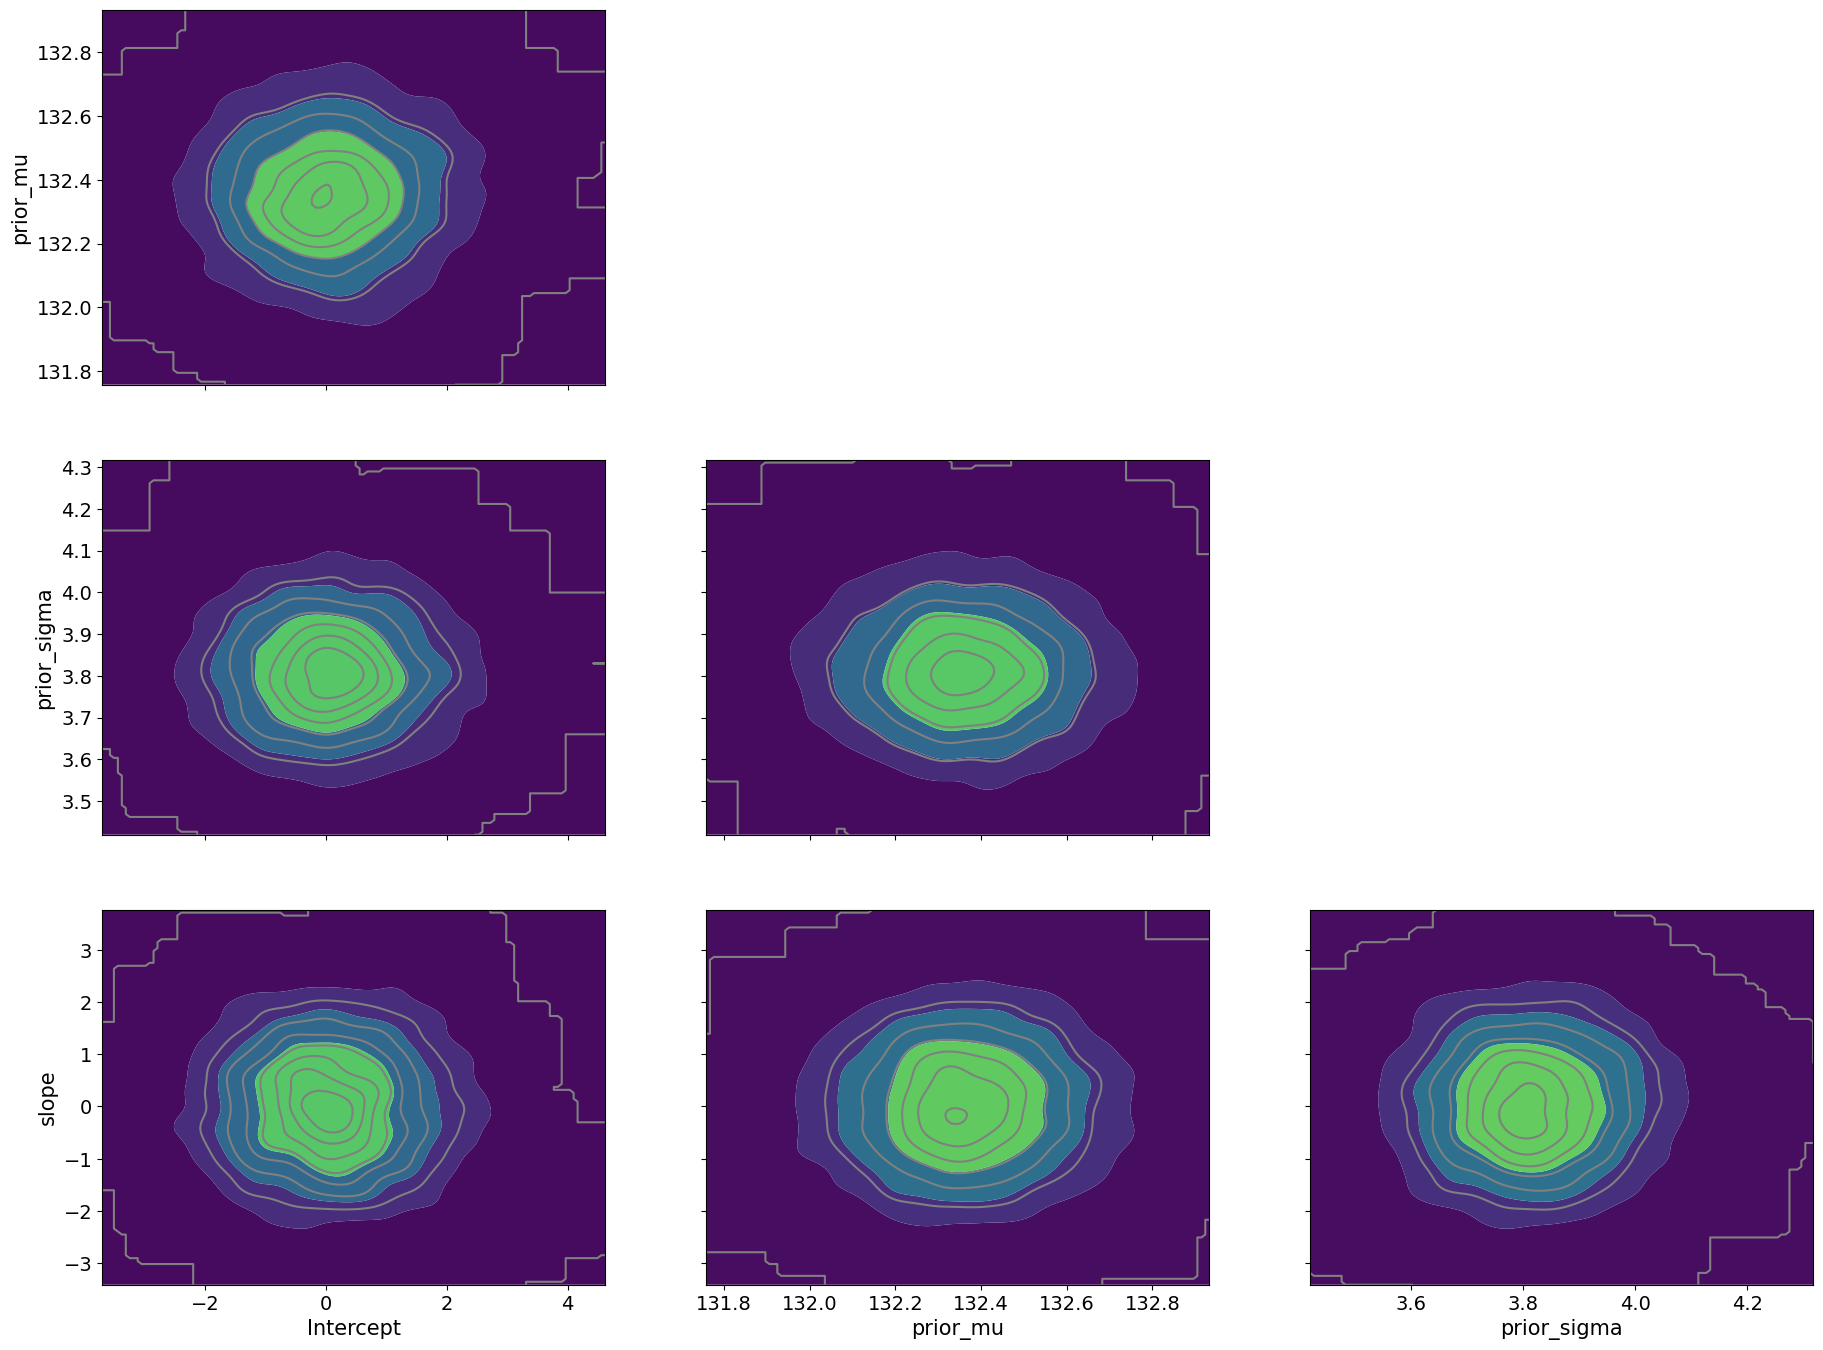

In [ ]:
az.plot_pair(trace, kind = 'kde')

In [ ]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.003,1.030,-1.926,1.975,0.022,0.018,2154.0,2137.0,1.0
prior_mu,132.355,0.162,132.045,132.658,0.002,0.002,5480.0,3450.0,1.0
prior_sigma,3.810,0.113,3.601,4.023,0.001,0.001,6601.0,4494.0,1.0
slope,0.001,0.987,-1.793,1.847,0.020,0.017,2349.0,2000.0,1.0


In [ ]:
trace.observed_data

<xarray.Dataset> Size: 9kB
Dimensions:  (y_dim_0: 560)
Coordinates:
  * y_dim_0  (y_dim_0) int64 4kB 0 1 2 3 4 5 6 7 ... 553 554 555 556 557 558 559
Data variables:
    y        (y_dim_0) float64 4kB 128.7 129.9 132.5 128.7 ... 129.1 132.9 125.9
Attributes:
    created_at:                 2024-12-19T07:58:00.395468+00:00
    arviz_version:              0.20.0
    inference_library:          pymc
    inference_library_version:  5.19.1

In [ ]:
trace.posterior

<xarray.Dataset> Size: 216kB
Dimensions:      (chain: 2, draw: 3000)
Coordinates:
  * chain        (chain) int64 16B 0 1
  * draw         (draw) int64 24kB 0 1 2 3 4 5 ... 2994 2995 2996 2997 2998 2999
Data variables:
    Intercept    (chain, draw) float64 48kB 0.7885 1.843 ... 0.2704 0.01742
    prior_mu     (chain, draw) float64 48kB 132.2 132.2 132.1 ... 132.2 132.2
    prior_sigma  (chain, draw) float64 48kB 3.899 3.829 3.774 ... 3.895 3.62
    slope        (chain, draw) float64 48kB -2.047 -1.891 ... -0.5691 0.6777
Attributes:
    created_at:                 2024-12-19T07:58:00.353070+00:00
    arviz_version:              0.20.0
    inference_library:          pymc
    inference_library_version:  5.19.1
    sampling_time:              55.529539346694946
    tuning_steps:               100

In [ ]:
trace.sample_stats

<xarray.Dataset> Size: 756kB
Dimensions:                (chain: 2, draw: 3000)
Coordinates:
  * chain                  (chain) int64 16B 0 1
  * draw                   (draw) int64 24kB 0 1 2 3 4 ... 2996 2997 2998 2999
Data variables: (12/17)
    acceptance_rate        (chain, draw) float64 48kB 0.9655 0.9686 ... 0.7808
    diverging              (chain, draw) bool 6kB False False ... False False
    energy                 (chain, draw) float64 48kB 1.555e+03 ... 1.552e+03
    energy_error           (chain, draw) float64 48kB 0.05246 -0.09194 ... 0.299
    index_in_trajectory    (chain, draw) int64 48kB 42 32 54 8 ... -96 15 6 -29
    largest_eigval         (chain, draw) float64 48kB nan nan nan ... nan nan
    ...                     ...
    process_time_diff      (chain, draw) float64 48kB 0.01187 ... 0.007085
    reached_max_treedepth  (chain, draw) bool 6kB False False ... False False
    smallest_eigval        (chain, draw) float64 48kB nan nan nan ... nan nan
    step_size              (chain, draw) float64 48kB 0.02171 ... 0.03357
    step_size_bar          (chain, draw) float64 48kB 0.03272 ... 0.03303
    tree_depth             (chain, draw) int64 48kB 7 6 7 5 5 7 ... 6 7 7 6 6 6
Attributes:
    created_at:                 2024-12-19T07:58:00.384920+00:00
    arviz_version:              0.20.0
    inference_library:          pymc
    inference_library_version:  5.19.1
    sampling_time:              55.529539346694946
    tuning_steps:               100

> Change the number of observations in the likelihood function and see the impact.

In [ ]:
occurences = np.random.normal(132.03, 3.77, 1200)

with pymc.Model() as hierarchical_model:
    #priors
    prior_sigma = pymc.HalfCauchy("prior_sigma", beta = 0.5)
    prior_mu = pymc.Normal('prior_mu', mu = 132.033, sigma = 0.999)
    intercept = pymc.Normal("Intercept", mu = 0.0, sigma = 1.0)
    slope = pymc.Normal("slope", mu = 0.0, sigma = 1.0)

    likelihood = pymc.Normal("y", mu = prior_mu, sigma = prior_sigma, observed = occurences)

with hierarchical_model:

    trace =  pymc.sample(draws = 3000, tune = 100, discard_tuned_samples = True)


Output()

Output()

In [ ]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.001,0.977,-1.836,1.848,0.022,0.019,1943.0,1848.0,1.0
prior_mu,132.173,0.107,131.964,132.372,0.001,0.001,5456.0,3555.0,1.0
prior_sigma,3.683,0.075,3.543,3.820,0.001,0.001,6279.0,4331.0,1.0
slope,-0.048,0.983,-1.898,1.778,0.023,0.017,1871.0,1941.0,1.0


array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'prior_mu'}>,
        <Axes: title={'center': 'prior_mu'}>],
       [<Axes: title={'center': 'prior_sigma'}>,
        <Axes: title={'center': 'prior_sigma'}>],
       [<Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'slope'}>]], dtype=object)

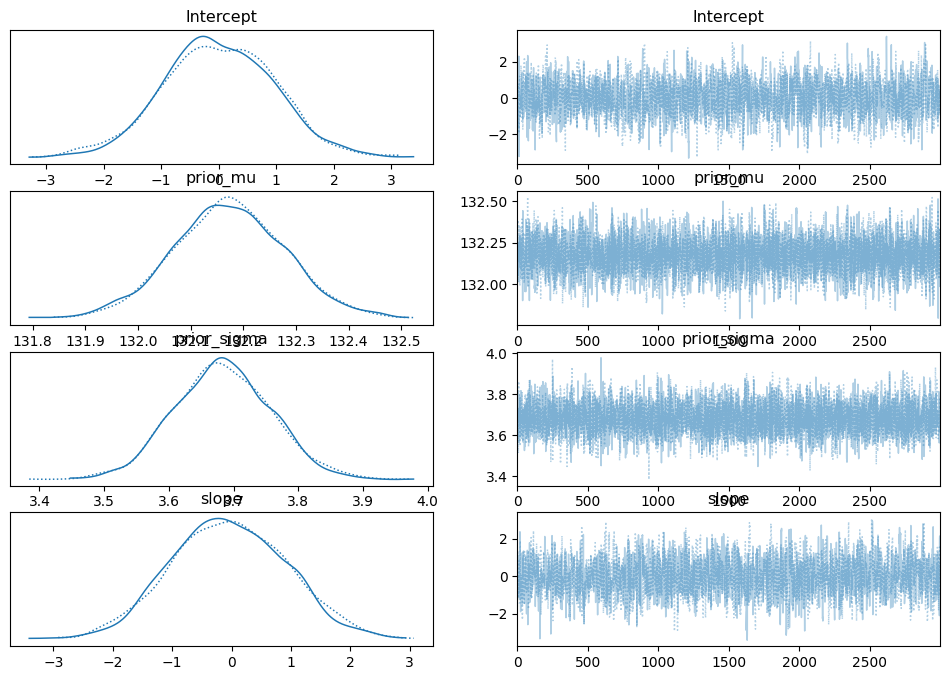

In [ ]:
az.plot_trace(trace)

array([<Axes: title={'center': 'Intercept'}>,
       <Axes: title={'center': 'prior_mu'}>,
       <Axes: title={'center': 'prior_sigma'}>,
       <Axes: title={'center': 'slope'}>], dtype=object)

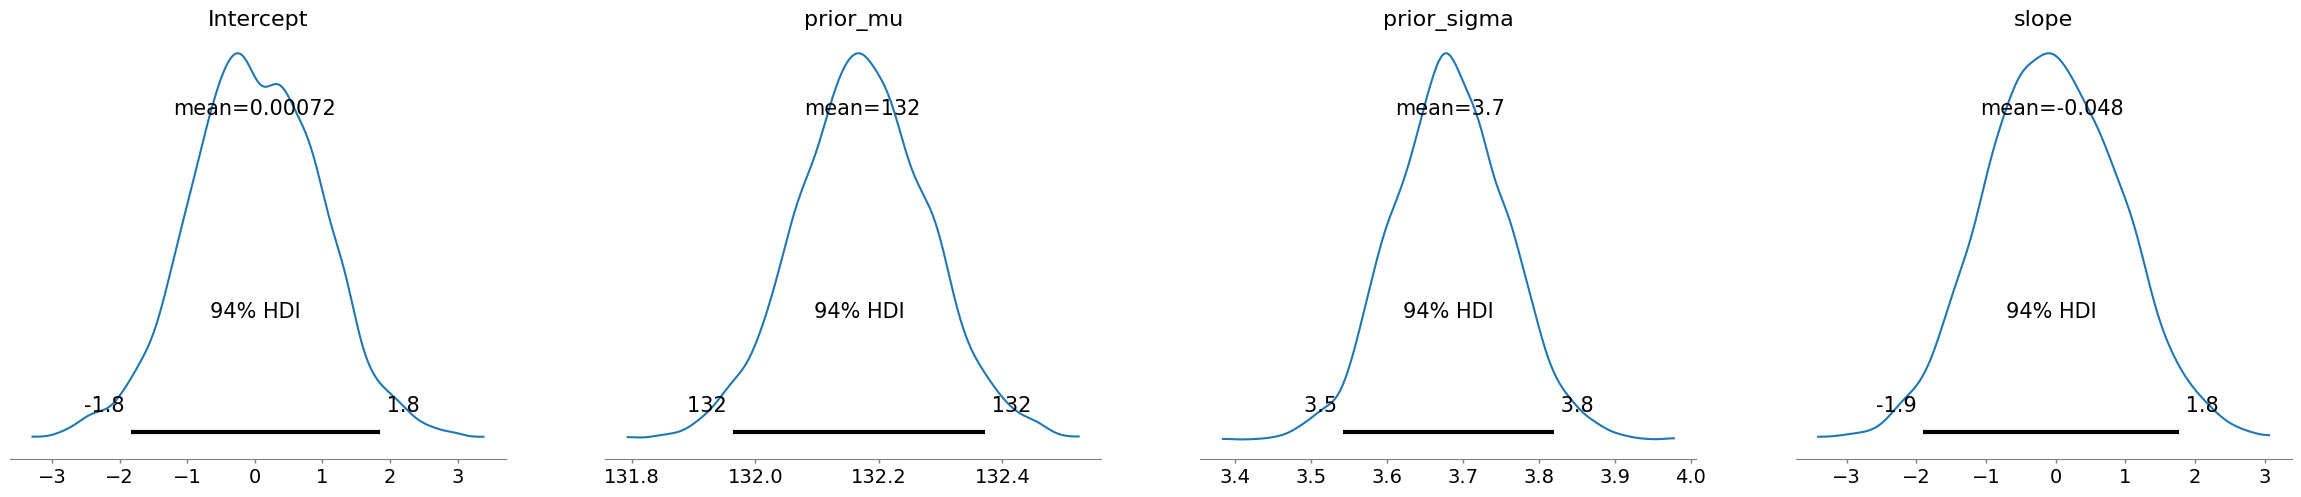

In [ ]:
az.plot_posterior(trace)